# Deutsch-Jozsa Algorithm

Deutsch's algorithm, which was later generalized to the Deutsch-Josza algorithm, was the first quantum algorithm with an exponential speed-up compared to any classical algorithm. Though the problem itself hasn't found any usefulness, it also showed that a quantum computer can answer a question <strong>WAY faster</strong> than any normal computer and with 100% probability of getting the right answer (excluding noise). It also inspired Simon's algorithm which in turn inspired Shor's algorithm.

#### Prerequisites:
* [Theory Basics: the Qubit](https://appliedqc.org/2020/01/20/Theory-Basics-The-Qubit.html)
* Familiar with superposition
* Familiar with X, and CNOT gates
* Familiar with binary

In [1]:
# This may take a few seconds
import numpy as np
import pandas as pd
from qiskit import *

## Deutsch's Problem
We'll first start with Deutsch's original algorithm. The problem it answered goes like this. Given an unknown binary function $f(x)$ (aka black box or oracle) that maps one bit to another bit, $f(x):\{0,1\} \rightarrow\{0,1\}$, determine if $f(x)$ is constant or balanced. A constant function means $f(0)=f(1)$ while a balanced function means $f(0)\neq f(1)$ (since we're only considering binary input and output). For one input qubit and one output qubit, there are only four unique binary functions. Let's name them $f_0,f_1,f_2, \text{and} f_3$ and tabulate their possible outputs.

$$
\begin{array}{c|c|c}
  & x=0 & x=1 \\\hline
  f_0(x)= & 0 & 0 \\\hline
  f_1(x)= & 0 & 1 \\\hline
  f_2(x)= & 1 & 0 \\\hline
  f_3(x)= & 1 & 1 \\
\end{array}
$$

From this table, we see $f_0$ and $f_3$ are constant functions while $f_1$ and $f_2$ are balanced functions. Now, let's say a friend randomly picks one of these functions but hides its identity from us calling it simply $f(x)$. Our friend implements the randomly chosen $f(x)$ as a unitary (probability conserving) operation $U_f$ that spans the input (q_0) and output (q_1) qubits like so...

In [2]:
circuit = QuantumCircuit(2,1)
circuit.append(qiskit.circuit.Gate(name='U_f', num_qubits=2, params=[]), [0,1])
circuit.draw()

How do we determine the behavior of $f(x)$? If you have a quantum computer, we use Deutsch's algorithm of course!

## Deutsch's Algorithm
The classical approach would be to try a lot of inputs and wait until we measure different outputs or until we've tried more than half of all possible inputs. In the worse case scenario, we'd need to try half of all possible input states then one more to break the tie between balanced or constant.

The quantum approach (1) makes a superposition of all possible inputs, (2) applies $f(x)$ through the $U_f$ operation to all possible inputs, and (3) interferes the possibilities such that a 0 measured on the input qubit (q_0) means $f(x)$ is constant and 1 means $f(x)$ is balanced.

Let's do it!

To makes a superposition of all possible inputs, we apply a Hadamard (H) to the input qubit (q_0). To get the right interference later on, the output qubit (q_1) needs to be a 1 before the H gate, so it will get gates X then H. We apply the mystery function $f(x)$ as a unitary operation $U_f$ on the qubits. To complete the interference, every qubit gets an H after $U_f$. Then we measure the input qubits. Ironically, to answer information about the function, we don't need to measure it's output! Our circuit will look something like this..
![png](Deutsch_algo.png)

On Qiskit, we get this, but add barriers around $U_f$ to help us remember where $U_f$ is when we do examples later on.

In [3]:
circuit = QuantumCircuit(2,1)
circuit.x(1)
circuit.h([0,1])
circuit.barrier()
circuit.append(qiskit.circuit.Gate(name='U_f', num_qubits=2, params=[]), [0,1])
circuit.barrier()
circuit.h([0,1])
circuit.measure([0],[0])

# Visualize the constructed circuit
circuit.draw()

### Examples of $U_f$: $U_{f_0}$
For sake of experimenting, let's pick some $U_f$s and see if the algorithm works! The simplest $U_f$ is nothing. This would correspond to a constant function; no matter what state we make q_0 (the input qubit), q_1 (the output qubit) will always be 0. Remember, for a constant function q_0 should always be in the 0 state.

In [4]:
# Constant U_f. Deutsch's algorithm should give a 0 on q_0
circuit = QuantumCircuit(2,1)
circuit.x(1)
circuit.h([0,1])
circuit.barrier()
circuit.barrier()
circuit.h([0,1])
circuit.measure([0], [0])

circuit.draw()

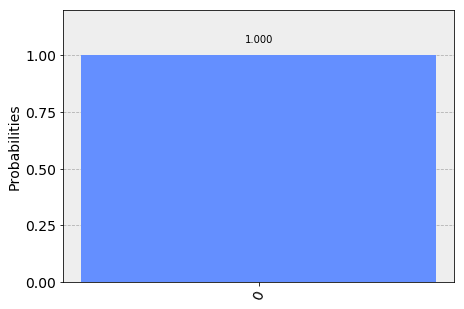

In [5]:
# Execute quantum circuit and view results
backend_sim = BasicAer.get_backend('qasm_simulator')
sim_shots = 10000

result = execute(circuit, backend_sim, shots=sim_shots).result()
counts = result.get_counts(circuit)
visualization.plot_histogram(counts)

Ta-da! The histogram shows 0 with 100% probability! For one qubit input and one qubit output, there are four unique $U_f$s . Let's run through the other three!

### Examples of $U_f$: $U_{f_1}$

In [6]:
# Balanced U_f. Deutsch's algorithm should give a 1 on q_0
circuit = QuantumCircuit(2,1)
circuit.x(1)
circuit.h([0,1])
circuit.barrier()
circuit.cx(0,1)
circuit.barrier()
circuit.h([0,1])
circuit.measure([0], [0])

circuit.draw()

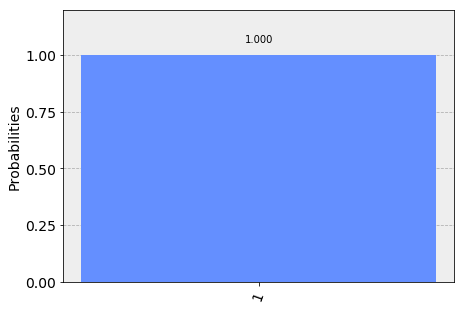

In [7]:
# Execute quantum circuit and view results
result = execute(circuit, backend_sim, shots=sim_shots).result()
counts = result.get_counts(circuit)
visualization.plot_histogram(counts)

### Examples of $U_f$: $U_{f_2}$

In [8]:
# Balanced U_f. Deutsch's algorithm should give a 1 on q_0
circuit = QuantumCircuit(2,1)
circuit.x(1)
circuit.h([0,1])
circuit.barrier()
circuit.x(1)
circuit.cx(0,1)
circuit.barrier()
circuit.h([0,1])
circuit.measure([0], [0])

circuit.draw()

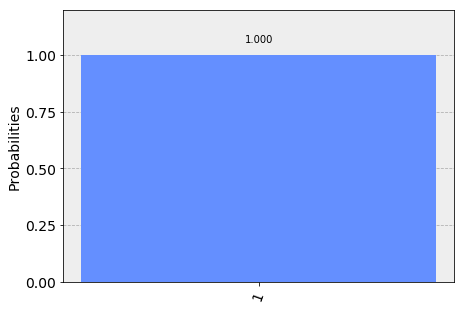

In [9]:
# Execute quantum circuit and view results
result = execute(circuit, backend_sim, shots=sim_shots).result()
counts = result.get_counts(circuit)
visualization.plot_histogram(counts)

### Examples of $U_f$: $U_{f_3}$

In [10]:
# Constant U_f. Deutsch's algorithm should give a 0 on q_0
circuit = QuantumCircuit(2,1)
circuit.x(1)
circuit.h([0,1])
circuit.barrier()
circuit.x(1)
circuit.barrier()
circuit.h([0,1])
circuit.measure([0], [0])

circuit.draw()

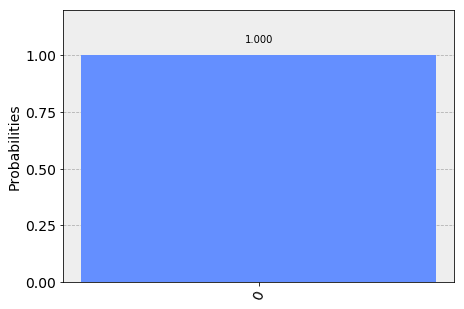

In [11]:
# Execute quantum circuit and view results
result = execute(circuit, backend_sim, shots=sim_shots).result()
counts = result.get_counts(circuit)
visualization.plot_histogram(counts)

### Examples of $U_f$: $U_{f_1}$ on a real quantum computer
Of course, we should also runs these on a <strong>real quantum computer</strong>. I'll pick $U_{f_1}$ which is a balanced function. You will need to have an [IBM Q Experience account](https://quantum-computing.ibm.com) to do this.

In [12]:
# Filter backends to find the least busy 5 qubit quantum computer and check current "pending_jobs"
from qiskit.providers.ibmq import least_busy

IBMQ.load_account() # Load account from disk
provider = IBMQ.get_provider(hub='ibm-q')
smaller_qcs = provider.backends(filters=lambda x: x.configuration().n_qubits == 5 and not x.configuration().simulator)
backend_real = least_busy(smaller_qcs)
max_real_shots = 8192

# Check status and "pending_jobs" to see how long it might take to run
backend_real.status()

BackendStatus(backend_name='ibmq_burlington', backend_version='1.1.4', operational=True, pending_jobs=7, status_msg='active')

In [13]:
circuit = QuantumCircuit(2,1)
circuit.x(1)
circuit.h([0,1])
circuit.barrier()
circuit.cx(0,1)
circuit.barrier()
circuit.h([0,1])
circuit.measure([0], [0])

# Visualize circuit
circuit.draw()

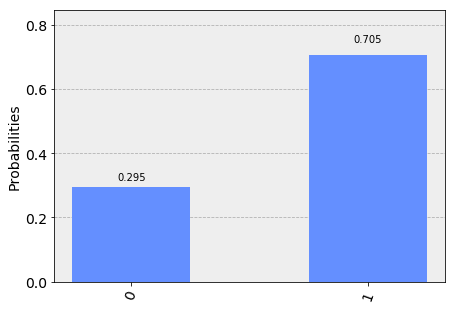

In [14]:
# Execute quantum circuit and view results on a real quantum computer. max shots = 8192.
result = execute(circuit, backend_real, shots=max_real_shots).result()
counts = result.get_counts(circuit)
visualization.plot_histogram(counts)

Deutsch's algorithm <strong>guarantees</strong> q_0 will be 1 at the output for a balanced $U_f$, but that's not what we just measured! There's ~30% of a 0 state. What happened?? Well, the quantum computer isn't perfectly quantum all the time: electrical noise in executing the gates, the temperature of the superconducting chips, vibrations, etc. etc. all work toward making these qubits no longer "quantum" and reduces it's efficiency at computing quantum algorithms.

## Deutsch-Jozsa Problem (and algorithm)
The extension from Deutsch to Deutsch-Jozsa is straight forward. We simply increase the number of input qubits from 1 to $n$ like this...
![png](Deutsch-Jozsa_algo.png)
The reset of the process is the same. Measuring the $n$ input qubits at the very end will give all 0's <strong>only</strong> for a constant function. If we measure <strong>any other</strong> state, we know $f(x)$ is a balanced function. Try and make you're own balanced or constant $U_f$ and see how it goes. Here's mine attempt using a balanced function of just one control not gate. Remember, for a balanced function, the measured state of the input qubits should give a state OTHER than 0000.

In [15]:
circuit = QuantumCircuit(5,4)
circuit.x(4)
circuit.h([0,1,2,3,4])
circuit.barrier()
circuit.cx(3,4)
circuit.barrier()
circuit.h([0,1,2,3,4])
circuit.measure([0,1,2,3], [0,1,2,3])

# Visualize circuit
circuit.draw()

### Deutch-Jozsa simulated quantum computer

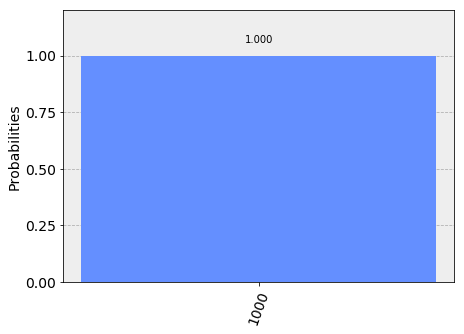

In [16]:
# Execute quantum circuit and view results
result = execute(circuit, backend_sim, shots=sim_shots).result()
counts = result.get_counts(circuit)
visualization.plot_histogram(counts)

### Deutsh-Jozsa real quantum computer

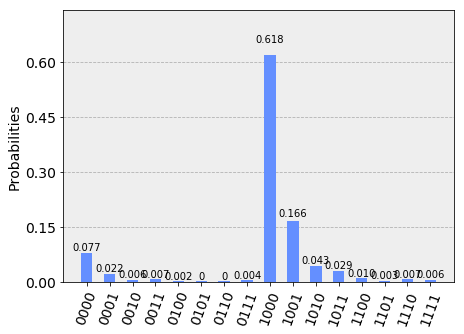

In [17]:
result = execute(circuit, backend_real, shots=max_real_shots).result()
counts = result.get_counts(circuit)
visualization.plot_histogram(counts)

## Quantum Speedup?
Deutsch-Jozsa was the first quantum algorithm that showed exponentially faster computation than a classical computer. For $n$ input bits, a classical computer would need, in a worst case scenario, roughly $2^{n-1}+1$ runs while a quantum computer <strong>needs only 1</strong>! Let's tabulate this to get a little prospective. Let's assume one run for both classical and quantum computers takes 10 nanoseconds (ns).

$$
\begin{array}{c|c|c}
  & \text{classical computation time} & \text{quantum computation time} \\\hline
  n=1 & 2 \text{ ns}& 1 \text{ ns} \\\hline
  n=10 & 513 \text{ ns}& 1  \text{ ns}\\\hline
  n=50 & 6.5 \text{ days}& 1 \text{ ns}\\\hline
  n=90 & 19.6 \gt \text{ billion years}& 1 \text{ ns}\\
\end{array}
$$

For context, $19.6$ <strong>BILLION YEARS</strong> is longer than the universe has been around. THAT's what an exponential speedup means. THAT's why people are so hot on making quantum computers work. (Though to solve other problem's than the Deutsch Problem.)